<a href="https://colab.research.google.com/github/aqsa-isha/CodexCue-Laptop-Price-Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load and Read the data
data = pd.read_csv('laptopPrice.csv')
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [ ]:
# First five rows of dataset
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [ ]:
# Last five rows of dataset
data.tail()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


In [ ]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [ ]:
# Description of dataset
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [ ]:
# Check for missing values
data.isnull().sum()

,0
brand,0
processor_brand,0
processor_name,0
processor_gnrtn,0
ram_gb,0
ram_type,0
ssd,0
hdd,0
os,0
os_bit,0


In [ ]:
for column in ['ram_gb', 'ssd', 'hdd', 'os_bit']:
    print(f"{column} unique values: {data[column].unique()}")


ram_gb unique values: ['4 GB' '8 GB' '16 GB' '32 GB']
ssd unique values: ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
hdd unique values: ['1024 GB' '0 GB' '512 GB' '2048 GB']
os_bit unique values: ['64-bit' '32-bit']


In [ ]:
columns_to_clean = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']

for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(' GB', '').astype(int)

data['os_bit'] = data['os_bit'].str.replace('-bit', '').astype(int)


data.head()


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,26990,3 stars,0,0


In [ ]:
data.dtypes

,0
brand,object
processor_brand,object
processor_name,object
processor_gnrtn,object
ram_gb,int64
ram_type,object
ssd,int64
hdd,int64
os,object
os_bit,int64


In [ ]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,26990,3 stars,0,0


<Figure size 1000x700 with 0 Axes>

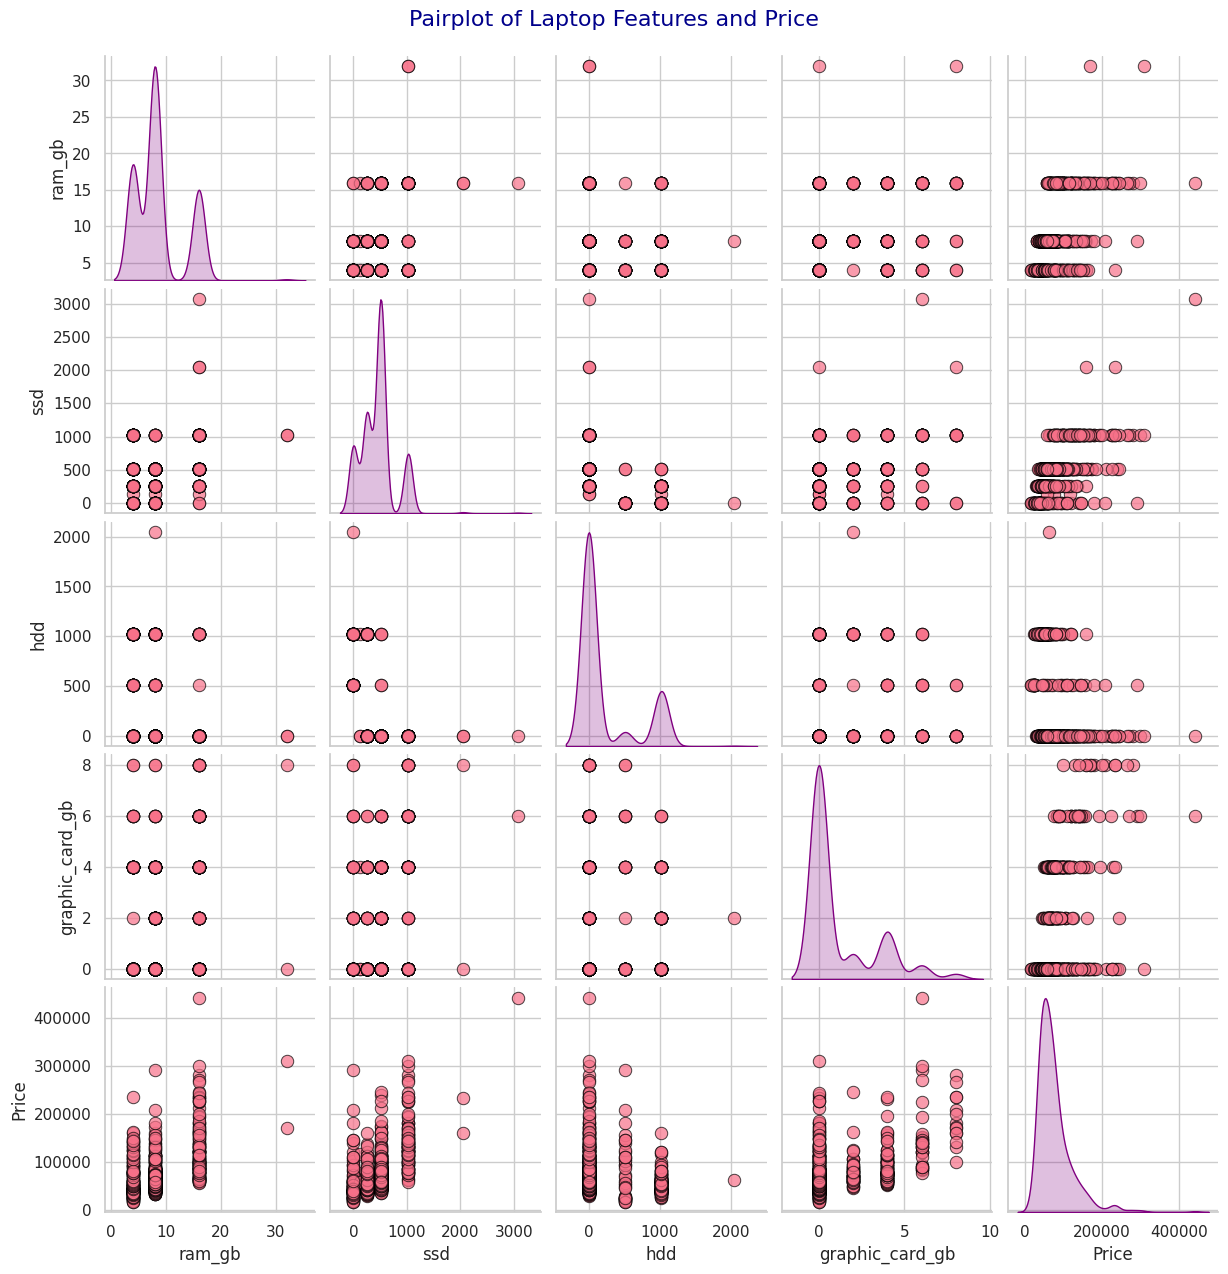

In [ ]:
sns.set(style="whitegrid", palette="husl")
plt.figure(figsize=(10, 7))
pairplot = sns.pairplot(data[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'Price']], diag_kind="kde", plot_kws={'alpha': 0.7, 's': 80, 'edgecolor': 'k'}, diag_kws={'shade': True, 'color': 'purple'})
pairplot.fig.suptitle('Pairplot of Laptop Features and Price', y=1.02, fontsize=16, color='darkblue')
plt.show()


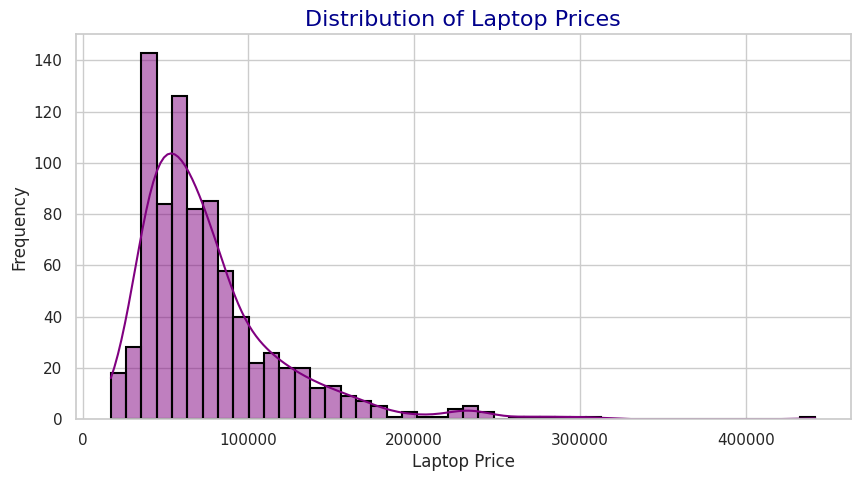

In [ ]:
# Plotting distribution of laptop prices
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.figure(figsize=(10, 5))
sns.histplot(data['Price'], kde=True, color='purple', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Laptop Prices', fontsize=16, color='darkblue')
plt.xlabel('Laptop Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


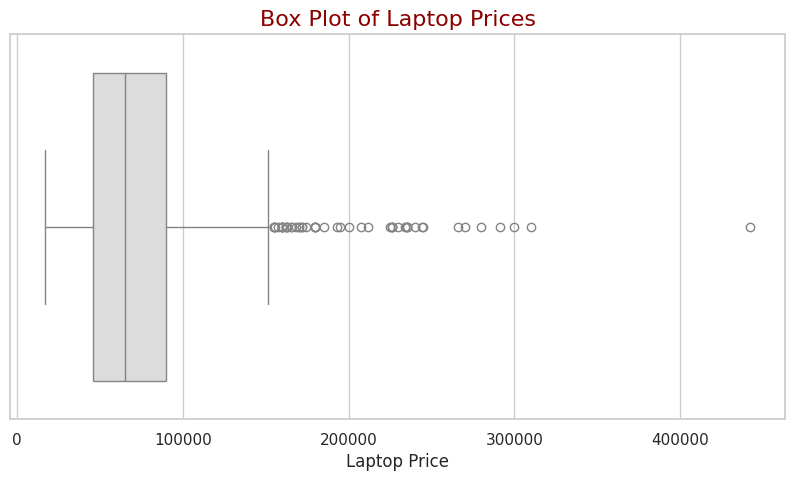

In [ ]:
# Box plot for laptop prices
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Price'], palette='coolwarm')
plt.title('Box Plot of Laptop Prices', fontsize=16, color='darkred')
plt.xlabel('Laptop Price', fontsize=12)
plt.show()


In [ ]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,26990,3 stars,0,0


In [ ]:
# Feature Engineering
data = pd.get_dummies(data, columns=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_type', 'os', 'weight', 'Touchscreen'], drop_first=True)
data.drop(['warranty','msoffice','rating','Number of Ratings','Number of Reviews'],axis=1,inplace=True)
data.head()


,ram_gb,ssd,hdd,os_bit,graphic_card_gb,Price,brand_ASUS,brand_Avita,brand_DELL,brand_HP,...,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,Touchscreen_Yes
0,4,0,1024,64,0,34649,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,4,0,1024,64,0,38999,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,4,0,1024,64,0,39999,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,8,512,0,32,2,69990,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,4,0,512,64,0,26990,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
# Define features and target
X = data.drop('Price', axis=1)  # Assuming 'Price' is the target variable
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mae, rmse

rf_mae, rf_rmse = evaluate_model(rf_model, X_test, y_test)
print("Random Forest MAE: ", rf_mae)
print("Random Forest RMSE: ", rf_rmse)


gb_mae, gb_rmse = evaluate_model(gb_model, X_test, y_test)
print("Gradient Boosting MAE: ", gb_mae)
print("Gradient Boosting RMSE: ", gb_rmse)


Random Forest MAE:  14052.10317704316
Random Forest RMSE:  25603.343371734267
Gradient Boosting MAE:  13628.087206647077
Gradient Boosting RMSE:  25101.629514578293


#### Gradient Boosting shows slightly better performance in both MAE and RMSE, suggesting it may be the more accurate model for predicting laptop prices

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best RMSE for Random Forest:", np.sqrt(-rf_grid_search.best_score_))


# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best RMSE for Gradient Boosting:", np.sqrt(-gb_grid_search.best_score_))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best RMSE for Random Forest: 23967.379238260426
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Best RMSE for Gradient Boosting: 22976.75915941107


In [61]:
# Retrain Random Forest with best parameters
best_rf_model = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Retrain Gradient Boosting with best parameters
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=3,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)
best_gb_model.fit(X_train, y_train)

# Evaluate Random Forest with best parameters
rf_best_mae, rf_best_rmse = evaluate_model(best_rf_model, X_test, y_test)
print("Best Random Forest MAE: ", rf_best_mae)
print("Best Random Forest RMSE: ", rf_best_rmse)

# Evaluate Gradient Boosting with best parameters
gb_best_mae, gb_best_rmse = evaluate_model(best_gb_model, X_test, y_test)
print("Best Gradient Boosting MAE: ", gb_best_mae)
print("Best Gradient Boosting RMSE: ", gb_best_rmse)



Best Random Forest MAE:  13901.838777934861
Best Random Forest RMSE:  25308.081904949897
Best Gradient Boosting MAE:  12958.030310967051
Best Gradient Boosting RMSE:  24179.148488694405


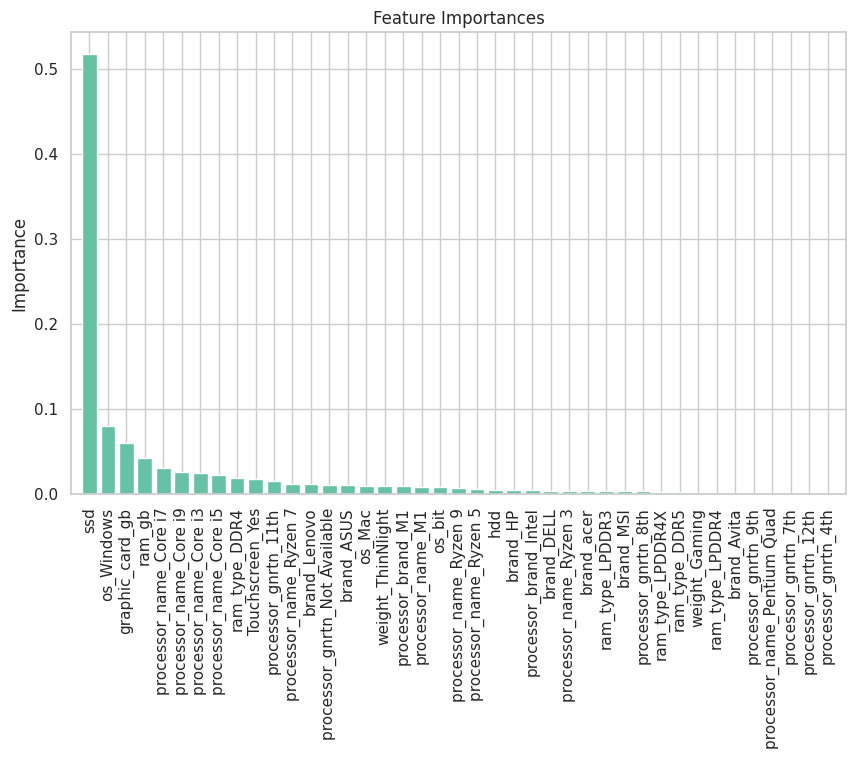

In [ ]:
import matplotlib.pyplot as plt

# Feature importance for Random Forest
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.show()


In [63]:
# Perform cross-validation for Best Random Forest
from sklearn.model_selection import cross_val_score
cv_scores_best_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mse = -cv_scores_best_rf.mean()
rf_rmse = np.sqrt(rf_mse)
print("Best Random Forest CV RMSE: ", rf_rmse)


# Perform cross-validation for Best Gradient Boosting
cv_scores_best_gb = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
gb_mse = -cv_scores_best_gb.mean()
gb_rmse = np.sqrt(gb_mse)
print("Best Gradient Boosting CV RMSE: ", gb_rmse)

Best Random Forest CV RMSE:  34395.969034393
Best Gradient Boosting CV RMSE:  34294.260468728804


####  Gradient Boosting is performing better after hyperparameter tuning based on cross-validation